# Autoencoders : A way of Unsupervised Learning of Nonlinear Manifold

## Keywords
- **```Unsupervised learning```**
- **```Nonlinear Dimensionality reduction``` = ```Representation learning``` = ```Efficient coding learning``` = ```Feature Extraction``` = ```Manifold learning```**
- **```Generative model learning(Recently, after VAE)```**
- **```Maximum likelihood density estimation```** <br/><br/>
- **To sum up, ```Autoencoder``` is unsupervised learning method, where loss function is negative likelihood. For trained autoencoder, encoder performs dimensionality reduction(manifold learning) while decoder performs like generative models.**

## Overview
**01. Revisiting DNNs**
- Loss function viewpoint 1 : Backpropagation
- Loss function viewpoint 2 : Maximum likelihood
- Maximum likelihood for autoencoders

**02. Manifold Learning**
- Four objectives of manifold learning
- Dimensionality reduction
- Density estimation

**03. Autoencoder**
- Autoencoder(AE)
- Denoising AE(DAE)
- Contractive AE(CAE)

**04. Variational autoencoder**
- Variational AE(VAE)
- Conditional VAE(CVAE)
- Adverserial AE(AAE)

**05. Applications**
- Retrieval
- Generation
- Regression
- GAN + VAE

### 01. Revisiting DNNs
#### Classical Machine Learning
1. **Collect training data**
2. **Define functions : model inputs, outputs, and loss functions**
    - Generally, DNN training are performed in backpropagation-fashion.
    - The two assumption about loss function while backpropagation is...
        - Total loss of DNN over training sample = Sum of loss for each training sample
        - Loss for each training example is a function of *final* output of DNN
     - These two conditions constrains the format of loss function
3. **Learning/Training : find parameter $\theta$ that minimizes the loss function for every training samples.**
    - Generally, Gradient Descent is applied but GD is one of the most simple method in optimization.
    - GD is iterative method to find best parameter, so updating rules of parameter $\theta$ and terminating condition should be defined.
    - $L(\theta + \Delta\theta) = L(\theta) + \nabla{L}\bullet\Delta\theta + \text{ second derivative }+ ...$
    - $\Delta\theta = -\eta\Delta{L}$ : updating rule, $\eta$ is learning rate
    - Learning rate should be generall small because we are approximating $L(\theta + \Delta\theta) - L(\theta)$ with taylor expansion, only for 1st derivative.
    - For big learning rate, the error will be diffused into a bigger ratio.
    - Mini-batch approach allows batch-wise parameter update.
    - Backpropagation is efficient algorithm for calculating the whole gradient of loss function. <br/>
  
4. **Evaluation and Infenence**

#### Viewpoint 1 : Backpropagation
- Backpropagation is an algorithm that propagates error signal into back layers.

- <p align = "center">
$\text{Backpropagation Algorithm : }$ <br/>
$\bullet\text{ Error of the output layer: }\delta^L = \nabla_aC\bullet\sigma'(z^L) \text{,  C : Cost(Loss)}$ <br/>
$\bullet\text{ Error relationship between two adjacet layers:  }\delta^L = \sigma'(z^l)\bullet((w^{l+1})^T\delta^{l+1})$ <br/>
$\bullet\text{ Gradient of bias : } \nabla_{b^l}C = \delta^l$ <br/>
$\bullet\text{ Gradient of weight : } \nabla_{w^l}C = \delta^l(a^(l-1))^T$ <br/>
$\bullet\text{ a : Final output of the layer, b : bias, w : weight} , \mathcal{D} : \text{Dataset}$ </p>
$\bullet\text{ weight, bias update rule : }w_{k+1}^l = w_{k}^l - \eta\nabla_{w_{k}^l}L(\theta_k, \mathcal{D}) \text{ and } b_{k+1}^l = b_{k}^l - \eta\nabla_{b_{k}^l}L(\theta_k, \mathcal{D})$

#### Viewpoint 2 : Maximum likelihood
- maximum likelihood approach is to find the parameter $\theta$ for given distribution that best explains the observed datapoints.
- i.e. $\theta^* = argmin_\theta[-\log{(p(y|f_\theta(x)))}]$
- if the paramter $\theta$ is optimized, the output of ML-based model is **optimal distribution** of dataset.
- Therefore we can **sample** some datas from optimal distribution for generation task, or calculate mean of the distribution for regression or classification task.
- Especially for generation task, we can argue that  the model has learned the **distribution of specific domain** by ML-approach, not a fixed single output.
- Due to the two constraints for backpropagation algorithm(```Constraint : total loss of DNN over training sampe = sum of loss for each training sample```), we have to calculate **negative log likelihood**, which transforms multiplication into summation.
- Additionally, we have to assume that each sample of **i.i.d(independent and indentical distribution)** to satisfy previously mentioned constraint.(*If each samplees are not i.i.d : cannot represent total loss function as sum of sample loss function*)
- In general, we can assume that the distribution of the data points as **Gaussian Distribution** and **Bernoulli Distribution**, which has correspoinding loss function of **MSE loss** and **Cross-Entropy** loss.

### 02. Manifold Learning
#### Introduction
- We assume that there is a **manifold** that contours around the original data space. 
- If we find a **d-dimensional manifold** in m-dimensional space, we can find explicit mapping $f : \mathcal R^d \to \mathcal R^m$ by projecting data points onto **d-dimensional manifold**.
- $f$ is called embedding function.

#### Four objectives of manifold learning
1. **Data compression** via encoder-decoder network
2. **Data visualization** : t-SNE mapping(t-distributed stochastic netwok embedding)
3. **Curse of dimensionality, manifold hypothesis**
    - If dimension of data in creasese, data will lead to sparse embedding, which causes poor performance in learning networks.
    - As dimension increases the density of the data becomes sparse, thus sample data are more needed for model estimation.
    - Manifold hypothesis(assumption) is an **assumption that there is a low dimensional subspace(manifold) that well-includes the high dimensional dataset.**
    - Which means, there is a **high-density region(so-called manifold) in high dimensional space when datas are spreaded on it.**
    - **Data distribution in high dimensional space** is never homogeneous!
4. **Discovering most important features** : Feature Extraction with manifold learning
    - While distance in eucledian space didn't provide a useful information, distance in manifold space can give us useful features.
    - Interpolation in manifold space can be used to sample plausible images, such as golf swing interpolation.
    - In general, learned manifold is **entangled**, but when a manifold is disentangled, it would be more interpretable.
    
#### Dimensionality Reduction Approaches
1. PCA
- Spread raw data on the space, and find the plane that minimizes the covariance.
- k principal axes are obtained, and its mapping equation is given as $h = f_\theta(x) = W(x-\mu)$ : like neural net form(Weight, Bias)
- It is already proved that AE includes PCA
- Linear manifold(hyperplane) projection, therefore PCA cannot disentangle S-shaped distribution in high dimensional space.
- **LLE, IsoMap** projections are nonlinear manifold projection, so they can create disentangled manifold.
2. Isomap, LLE
- Construct neighborhood graph $d_x(i,j)$ using euclidean distance
- $\epsilon$-isomap : neighbors within a radius $\epsilon$.
- $K$-isomap : $K$ neareset neighbors
- Assume that "neighborhoods"(i.e. super close ones) are also neighbors in manifold.
- *Search for more details.*

#### Density estimation
- Parzen windows
- Isotropic parzen window
- Manifold parzen window
- Non-local manifold parzen window
- Dimensionality reduction approaches like PCA, LLE, Isomap, and density estimation approaches including parzen windows and its variations are **neighborhood based training**, which **explicitly use distance based neighborhoods**.
- They also typically use euclidean neighbors so these nearset neighbor approach can be **inaccurate when data is sparse, and in high-dimension.**

### 03. Autoencoder
#### Vanilla Autoencoder
- To briefly summarize AE, autoencoder make output layer same size as input layer
- $x \to z\text{(latent variable)} \to y$
- $x \to z : \text{encoder, h(.)} \text { and } z \to y :  \text{decoder, g(.)}$
- Solve unsupervised learning problem in supervised learning fashion
- Loss function indicates discrepancy between input $x$ and output $x'$
- If the output $x'$ is similar to $x$, the AE network is learning well, and the latent variable $z$ indicates compressed representation.
- After training, decoder and encoder are independently used for another tasks but these networks are at least trained well for **training DB distribution.**
- Minimal performance is guaranteed in AE : encoder can compress well at least for the data in training DB, and decoder can generate results well at lest for the data in training DB.
- **GAN** has no minimal performanc guaranteed and hard to train, but GAN can create out-of distribution outputs.
- $\text{Reconstruction Error : } L(x,y) = L_{AE} = \sum_{x \in D}{L(x,g(h(x)))}$
- AE connection to PCA & RBM(Restricted boltzmann machine)
    - PCA : for bottleneck architecture of AE(i.e. $d_z < d$), with linear neurons and squared loss, autoencoder learns same subspace as PCA. (But don't learn the same basis)
    - RBM : with a single hidden layer with sigmoid non-linearity and sigmoid output non-linearity (not used nowadays)
- We can also use autoencoder as pretrained network, to innitialize weights and biases of another downstream task network.
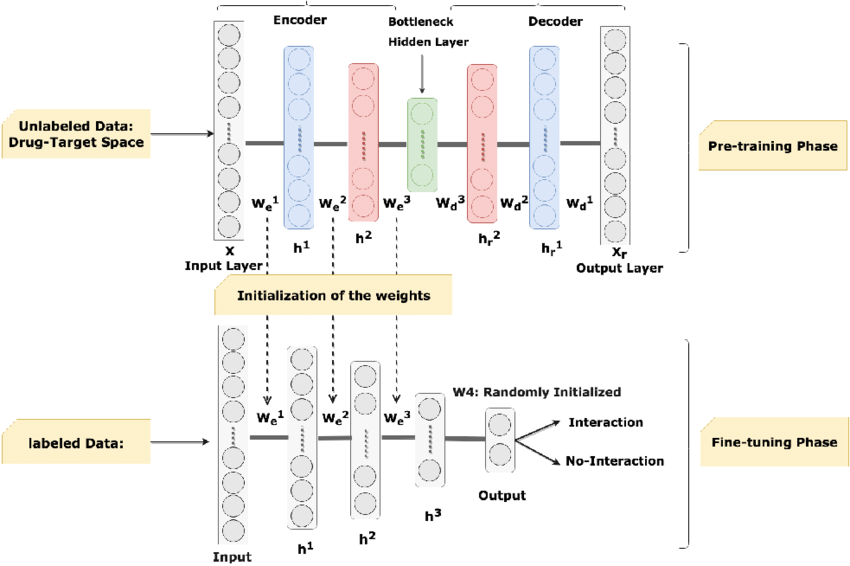
    
#### Denoising Autoencoder
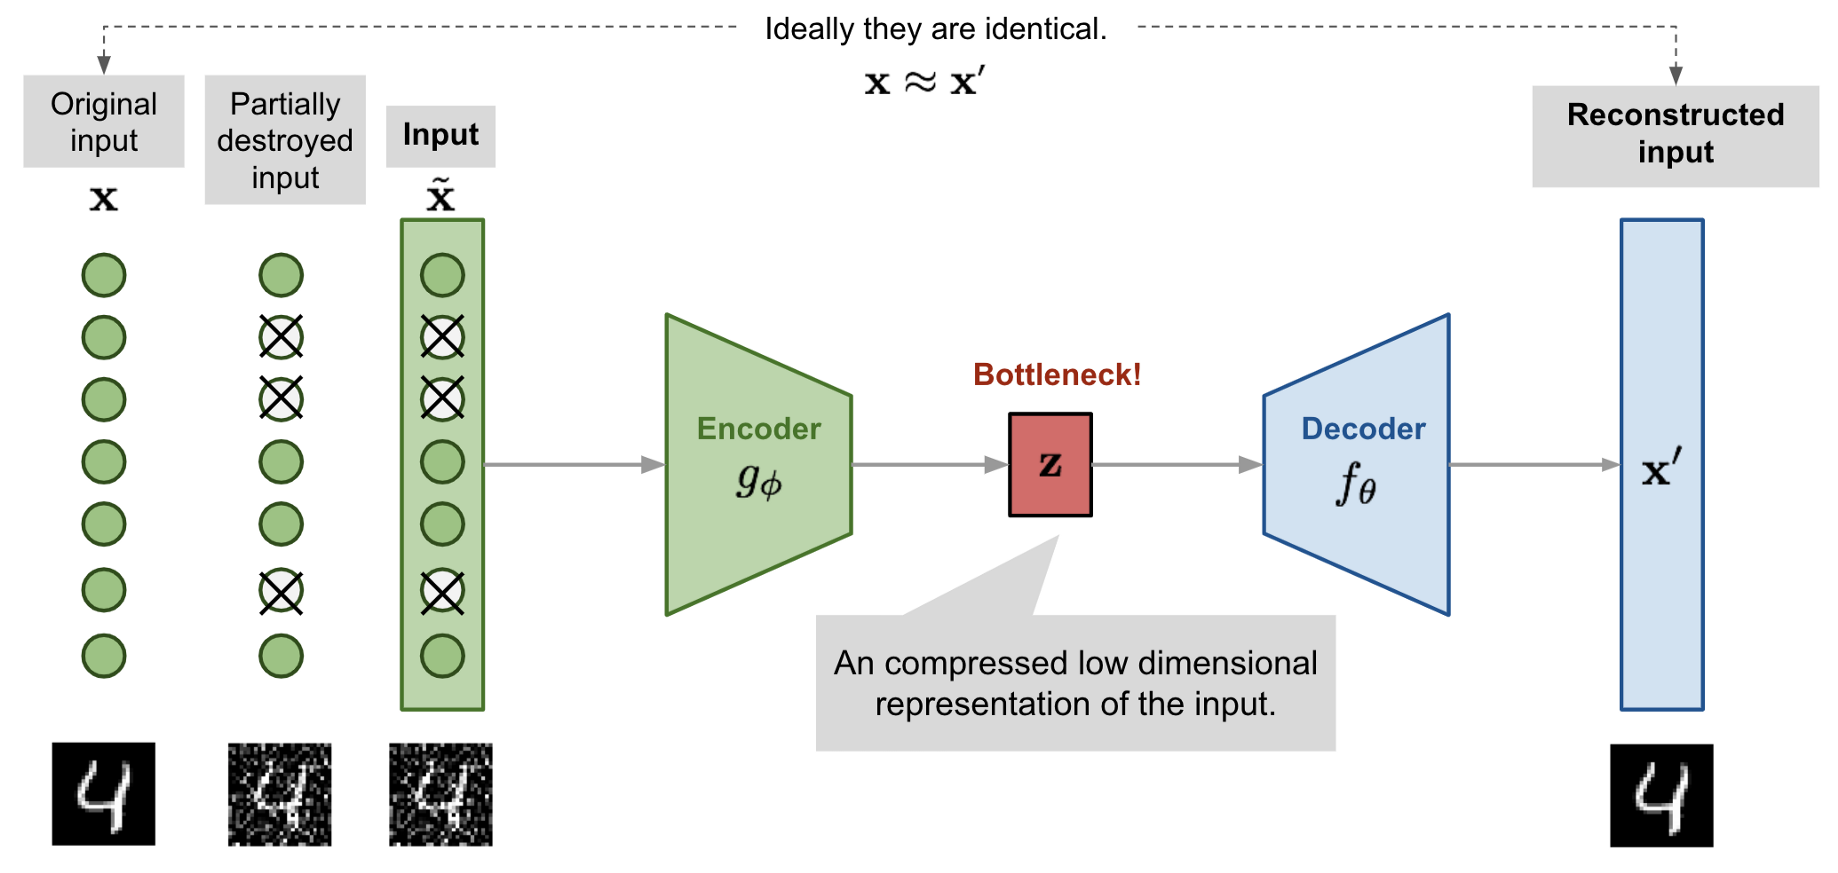
- The key concept of denoising autoencoder is that **'visually identical' images will be mapped to identical manifold**.
- Researchers added salt and pepper noise into raw input image, creating noised image.
- Loss function was design to evaluate discrepancy between output image of AE & raw input(which is not noised).
- Therefore, trained AE performs denoising task.
- Stacked denoising autoencoder(SDAE) : stack several layers in contraction and expansion path.
- **Generation task with DAE**
    - In expansion path, we can sample hidden layers assuming bernoulli distribution.
    - Therefore, we can obtain sampled output which is slightly varied from input images.
    
#### Contractive Autoencoder
- DAE encourages **reconstruction to be insensitive** to input corruption.
- In alternative, CAE encourages **representation, latent variable** to be insensitive.
- $L_{SCAE} = \sum_{x \in D}{L(x,g(h(x)))} + \lambda E_{q(\tilde{x}|x)}{[||h(x) - h(\tilde{x})||^2]}$
- First term is called **reconstruction error,** and second term is **stochastic regularization term** which indicates that representation should be preserved even though there is a slight perturbation.
- However, SCAE stochastic regularization term $\lambda E_{q(\tilde{x}|x)}{[||h(x) - h(\tilde{x})||^2]}$ is hard to compute, so taylor expansion is applied and approximate as following.
- $E_{q(\tilde{x}|x)}{[||h(x) - h(\tilde{x})||^2]} \sim ||{\partial{h} \over \partial{x}} (x)||_F^2 \text{ : Analytic Regularization}$

### 04. Variationial Autoencoder
#### Variational AE(VAE)

1. Generative model : latent variable model
- 앞서 언급한 Autoencoder와 Variational Autoencoder는 의미적으로 전혀 다른 개념입니다.
- Autoencoder의 목적은 Data compression을 위한 네트워크이고, 이 문제를 Supervised fashion으로 풀기 위해서 Decoder 단을 달아서 Loss를 구하는 방식으로 학습한 것입니다.
- 반대로 VAE의 목적은 latent space $\mathcal Z$로부터 적절한 sampling function을 찾아서 새로운 output $x$를 Generate하는 것입니다. 그리고 이것을 가능하게 하기 위해서, Encoder 단을 달아서 Input들의 값을 latent space로 임베딩했을 때의 distribution(잘 알려진 형태, bernoulli or gaussian)을 추정하여 해당 distribution으로부터 sampling한 $\tilde{z}$를 다시 Decoder를 통해 Output으로 Generate합니다.
- $z \text{~} p(z) : \text{random variable}, g_\theta(\bullet) : \text{deterministic generator function, parameterized by }\theta, x = g_\theta(z) : \text{random variable}$
- 결과적으로 VAE가 Maximize하고자 하는 것은 특정한 이미지 $x$가 등장할 확률 $p(x)$ 그 자체입니다. 
- 이 $p(x)$는 sampling된 z에 의해서 결정되므로, $p(x) = \int{p(x|g_\theta(z))p(z)dz}$를 maximize하는 것이 목표가 됩니다. 이때 특정한 latent variable z가 sampling될 확률 $p(z)$는 Encoder를 통해 획득한 z에 관한 통계량들을 바탕으로 가정된 단순한 sample distribution에 의해서 결정됩니다.
    - 여기에서의 드는 의문은 이것입니다. z를 sampling할 때의 분포가 굉장히 단순한 분포, 이를테면 가우시안 혹은 베르누이 분포라면, 이전에 보았을 때에는 latent variable z의 분포는 manifold의 분포이므로 상당히 복잡하다고 알고 있었는데 어떻게 가우시안, 베르누이 같은 단순한 분포로부터 manifold의 복잡한 분포를 represent할 수 있을까요?
    - Generator Network에서 여러 개의 레이어를 사용할 때 처음 몇 개의 레이어들만 거쳐도 충분히 nonlinearlity가 높고 복잡한 형태의 latent space(처음 z를 sampling할 때의 단순한 분포 $\to$ 복잡한 중간 layer의 latent space)로 mapping되고, 그 다음 몇 개의 Generator layer에서는 latent vector가 실제 output(이를테면 이미지)을 생성하게 됩니다.
- 정확한 $p(x)$의 값은 $p(x) = \int{p(x|g_\theta(z))p(z)dz}$로 계산할 수 있지만, Monte Carlo approach에 따르면 $p(x) \sim \sum_i{p(x|g_\theta(z_i))p(z_i)}$로 근사할 수 있습니다.
- $p(x) \sim \sum_i{p(x|g_\theta(z_i))p(z_i)}$에서, $p(z_i)$는 $z_i$가 $z$의 distribution($\mathcal{N}(\mu, \sigma^2)$)에서 sampling될 확률이고, $p(x|g_\theta(z_i))$는, sampling된 $z_i$에 대해서 generator network를 거친 output $g_\theta(z_i)$를 평균으로 하고, 표준편차가 $\sigma_i^2 \bullet I$인  다변량 가우시안 분포에서 실제 train DB 속의 이미지 $x$가 등장할 확률입니다.
- 왜 $p(x|g_\theta(z_i))$를 계산한 likelihood를 maximize하지 않고 $p(x)$를 maximize하려는 걸까요? 생성기에 대한 확률모델을 Gaussian으로 하면, MSE loss와 identical한 개념이고 실제 x와 MSE loss가 더 작은 이미지가 p(x)에 기여하여 뽑힐 확률이 더 높다는 것을 지난번에 설명하였습니다. 
- 이를 수식으로 표현하면 $||x-z_1||^2 < ||x-z_2||^2 \to p(x|g_\theta(z_1)) > p(x|g_\theta(z_2))$의 관계입니다. MSE loss가 적을수록 $g_\theta(z_i)$를 중심으로 한 gaussian distribution을 가정했을 때 sampling될 확률이 높을 것입니다.
- 그런데 어떠한 이미지를 x,y축으로 1픽셀씩만 움직여도 semantically similar하지만 MSE loss는 크게 증가하는 반면, 이미지 일부를 제거하여 semantical하게 전혀 다른 이미지인데도 MSE loss는 작은 경우가 있습니다. 그래서 MSE 관점에서 sampling 확률을 결정하는 것은 문제가 됩니다.
- 그래서 단순히 prior distribution을 바탕으로 sampling하면 제대로 학습이 이루어지지 않습니다. 그렇기 때문에, 단순히 prior에서 sampling을 해서($p(z)$ term을 의미) 학습하는 것이 아니라, 이상적인 sampling 함수 (= 실제 Train DB 속의 $x$와 의미적으로 가까운 $z$들을 sampling할 수 있는 함수, $p(z|x)$를 근사적으로 추정할 수 있는 우리에게 익숙한 형태의 가상의 함수 $q_\phi (z|x) \sim p(z|x)$) 를 생각하여 이 $q_\phi (z|x)$로부터 z를 sampling할 것입니다.
- 이 지점에서 ELBO(Evidence Lower BOund) concept가 나오게 됩니다.<br/>
$log(p(x)) = log(\int{p(x|z) {p(z) \over q_\phi(z|x)}q_\phi(z|x)dz) \geq \int \log(p(x|z){p(z) \over q_\phi(z|x)}})q_
\phi(z|x)dz : \text{by Jensen Inequality}$
$log(p(x)) \geq \int{\log{(p(x|z))q_\phi(z|x)dz}} - \int{\log{({q_\phi(z|x) \over p(z)})q_\phi(z|x)dz}} = \mathbb{E}_{q_\phi(z|x)}[\log(p(x|z))] - KL(q_\phi(z|x) || p(z)) : ELBO(\phi)$

- 요약하면 VAE에서는 두 가지 문제를 풀어야 합니다. 첫째는 Optimal sampling function을 잘 흉내내도록 하는 파라미터 $\phi$를 찾아야 하는데, 그때 조건은 $ELBO(\phi)$를 maximize하는 것입니다. 이것이 variational inference step입니다. 둘째는 Maximum likelihood problem인데, 이것은 이미 ELBO 수식 내에 포함되어 있습니다. $q_\phi(z|x)$의 분포를 따르는 z에 대해서 $log(p(x|z))$를 계산하는 Term이 있는데, 이 부분이 maximum likelihood 부분입니다.
- 결론적으로 $\sum_i {-\mathbb E_{q_\phi}[\log(p(x_i|g_\theta(z)))]+KL(q_\phi(z|x_i)||p(z))}$를 $\phi,\theta$에 의해 각각 minimize하면 각각이 Variational Infernece, MLE problem이 됩니다.
- 그래서 Encoder-Decoder 구조에서, 인코더는 Train DB의 x를 바탕으로 sampling 함수를 추정하고, 디코더는 samling 함수에서 sampling한 z를 바탕으로 x를 generate합니다. 그리고 그 loss function은 위에서 언급한 ELBO term이 될 것입니다.
- ELBO를 자세히 보면 $L_i(\phi, \theta, x_i) = {-\mathbb E_{q_\phi}[\log(p(x_i|g_\theta(z)))]+KL(q_\phi(z|x_i)||p(z))}$ 인데, 앞부분 기댓값 부분과 뒤의 KL divergence term으로 분해해 볼 수 있습니다.
- 앞부분은 Reconstruction error로, 현재 샘플링 함수에 대한 negative log likelihood입니다. 즉, 이전의 AE 관점과 유사하게 $x_i$가 얼마나 잘 복원되는가에 대한 항입니다.
- 뒷부분은 현재 샘플링 함수 $q_\phi{(z|x)}$에 대한 Regularization term인데, 비교적 단순한 확률 분포인 $p(z)$, prior와의 KL divergence 값이 작을수록 좋은 샘플링 함수라고 할 수 있습니다.
- 이제 ELBO를 실제로 계산할 수만 있다면, Loss function으로 활용하는 것이 가능해 보입니다. 먼저 KL Term을 계산하기 이전에 $q_\phi{(z|x)}$, $p(z)$를 각각 $\mathcal N(\mu_i, \sigma_i ^2 I), \mathcal N(0,I)$로 가정하겠습니다. 그러면 KL Term은 전개하여 closed term으로 계산이 가능합니다.
- Reconstruction error의 경우에는 monte carlo fashion으로 $q_\phi(z|x_i)$(gaussian 가정)로부터 L개의 샘플 $z^{i,1}, ..., z^{i,L}$을 뽑아 $g(\bullet)$를 거쳐 나온 output의 log likelihood을 평균 내어 구할 수 있습니다. 
- 이때 이 값들은 모두 계산 가능하지만 샘플링이 들어간다는 하나의 문제가 있습니다. $q_\phi(z|x_i)$에서 sampling을 하다 보니, 중간값이 random하게 바뀌는 node가 존재하게 되므로 backpropagation이 불가하게 됩니다.
- VAE 논문에서는, 이를 해결하기 위해서 reparameterization trick을 사용했는데, $z^{i,l} \sim \mathcal N(\mu_i, \sigma_i^2 I)$ 대신에 $z^{i,l} = \mu_i + \sigma_i^2 \bullet \epsilon, \text{ where }\epsilon \sim \mathcal N(0,I)$ 의 형태로 random term을 엡실론으로 따로 떼어내어 backprop이 가능하게 하고 있습니다.
- 참고로 Encoder, Decoder에서 어떤 확률분포를 사전에 가정할지는 다르게 결정할 수 있지만, 주로 Encoder 단에서는 Gaussian으로 고정해야 합니다(계산상의 어려움). 이후 Adverserial AE에서 이 문제를 해소하게 됩니다.

#### Conditional VAE(CVAE)
- 지금까의 VAE에서는 Unsupervised fasion으로 학습을 진행했습니다. 
- 만약 label 정보가 전부 있어 Supervised fashion으로 학습을 할 수 있게 되거나, 혹은 일부만 있어 Semi-supervised fashion으로 학습하게 되면 어떻게 될까요? 
- 그냥 X를 넣어줄 때 X,y를 concat하여 넣어주면 됩니다. 만약 y 정보가 없다면 y를 추정하는 네트워크를 달아서 추정된 y를 넣어주면 되는 일입니다. 
- 사실 이것이 CVAE의 컨셉과 동일합니다. CVAE는 conditional, 즉 y 정보가 알려져 있을 때의 조건부 확률에 대한 VAE이므로, ELBO term 역시 약간만 다를 뿐 구조는 동일합니다. 
- 그리고 CVAE는 VAE보다 더욱 빠르게 수렴하는 경향이 있으며, latent vector z는 아마도 label을 제외한 feature들을 학습할 가능성이 높습니다.
- M1, M2, M3 version을 찾아보면 그 아키텍처가 모두 다릅니다.

#### Adverserial AE(AAE) and GAN
- Adverserial AE의 도입 배경은, ELBO에서 KL divergence를 계산하려면 Decoder 단에서의 distribution만 변경 가능하고, Encoder 단은 Gaussian Distribution으로 고정해야만 했습니다. 그래서 KL divergence를 GAN loss로 치환하여 임의의 manifold 형태를 가정할 수 있다는 장점을 갖고 있습니다.
- GAN의 목적은 Generator Network와 Discriminator Network가 존재하여, Generator network는 $p_z(z)$에서 sampling한 z를 바탕으로 G(z)를 생성하여, Discriminator network가 D(G(z))=1(True)로 판정하기를 바랍니다. 동시에, Discriminator netowkr는 실제 real data x와 G(z) 중에서 D(x)=1, D(G(z)) = 0으로 판정하기를 바랍니다.
- 따라서, GAN의 value function $V(D,G) = \mathbb E_{x\sim p_{data}(x)}[\log D(x)] + \mathbb E_{z\sim p_z(z)}[log(1-D(g(z)))]$ 를 가지고서 D는 V(D,G)를 minimize하고, G는 V(D,G)를 maximize하는 것이 목표입니다.
- 그리고 이 과정에서 GAN은 $G(z) \sim p_{data}(x)$로 만들고자 합니다.
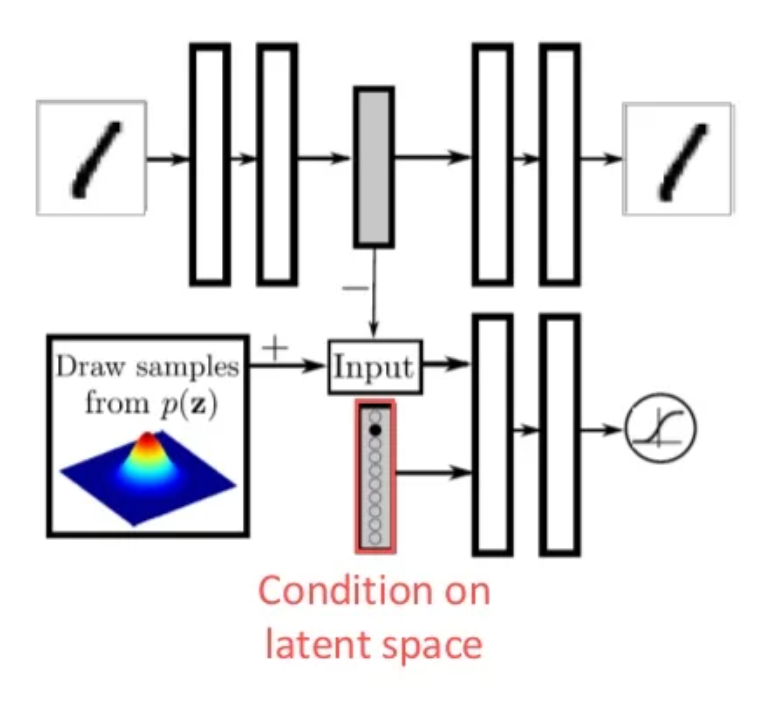
- AAE에서는, 위 그림처럼 prior distribution $p(z)$에서 sampling된 진짜 input과 AutoEncoder를 통해서 생성된 $z \sim q(z)$ 가짜 input을 구분하는 Discriminator를 달아 adverserial cost를 ELBO의 두번째 regularization term으로 설정하게 됩니다.
- 원래 VAE loss는 $L_i(\phi, \theta, x_i) = {-\mathbb E_{q_\phi}[\log(p(x_i|g_\theta(z)))]+KL(q_\phi(z|x_i)||p(z))}$ 였는데, 여기서 KL divergence term은 사라졌습니다. 
- KL term 대신, GAN loss인 $V(D,G) = \mathbb E_{z \sim p(z)}[\log D(z)] + \mathbb E_{x \sim p(x)}[\log{(1-D(q_\phi(x)))}]$를 사용하게 됩니다. AAE에서는 $V_i(\phi, \lambda, x_i, z_i) = \log{d_\lambda(z_i) + log(1-d_\lambda(q_\phi{(x_i))}}$를 사용합니다.
- Autoencoder는 E2E training이 가능했는데, GAN은 Discriminator와 Generator가 서로 상반된 기능을 하기 때문에 한쪽을 학습할 때는 다른 쪽을 FIx해놓고 번갈아 학습해야 합니다.
- 그래서 AAE의 학습 과정은 AE update($update \phi, \theta$ according to **only reconstruction error**) $\to$ Update Discriminator $\to$ Update Generator의 순서로 이루어지게 됩니다.
- AAE에서는 $p(z)$를 gaussian뿐만 아니라 Gaussian mixture, swiss roll 형태 등으로 manifold를 바꿀 수 있습니다.